In [3]:
import numpy as np
import pandas as pd
from scipy.stats import norm


#### 1. Central limit theoreum
##### The distribution of large samples of an independent variable is normal, regardless of the distribution of the independent variables. (But they have to identically distributed, or come from the same distribution)

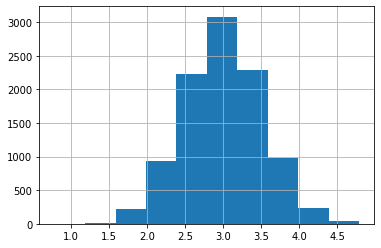

In [4]:
num_samples = 10000
samples = norm.rvs(loc=3, scale=.5, size=(1, num_samples))[0]
lunch_time = pd.Series(np.exp(samples),name='lunch time in minutes')
log_lunch_time = pd.Series(samples, name='log of lunch time in minutes')
log_lunch_time.hist() 

#### 2. Create two uncorrelated normal distributions

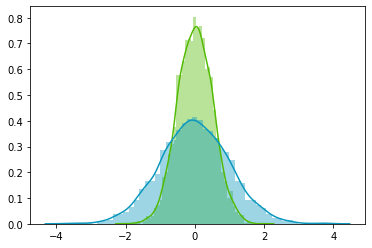

In [8]:
from scipy.stats import norm
import seaborn as sns

num_samples = 5000
signal01 = norm.rvs(loc=0, scale=.5, size=(1, num_samples))[0]
signal02 = norm.rvs(loc=0, scale=1, size=(1, num_samples))[0]
sns.distplot(signal01, color="#53BB04")
sns.distplot(signal02, color="#0A98BE")

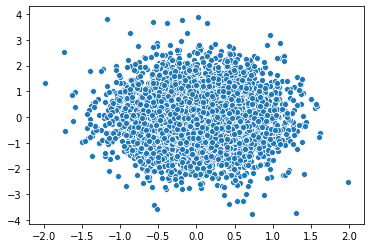

In [9]:
sns.scatterplot(signal01,signal02)

#### Shows those two normal distributions are uncorrelated

In [10]:
np.corrcoef(signal01, signal02)

array([[ 1.        , -0.00546747],
       [-0.00546747,  1.        ]])

#### 3. adding correlation to uncorrelated normal distributions

In [11]:
import numpy as np
from scipy.stats import norm
num_samples = 5000

signal01 = norm.rvs(loc=0, scale=1, size=(1, num_samples))[0]
signal02 = norm.rvs(loc=0, scale=1, size=(1, num_samples))[0]

##### 3.1 specify desired std and correlations

In [12]:
std01 = 11.2
std02 = 0.5

std_m = np.array([
    [std01, 0],
    [0, std02]
])

# specify desired correlation
corr_m = np.array([
    [1, .75],
    [.75, 1]
])

# calc desired covariance (vc matrix)
cov_m = np.dot(std_m, np.dot(corr_m, std_m))

#### 3.2. Use Cholesky’s algorithm to decompose the vc matrix

In [13]:
from scipy.linalg import cholesky
cky = cholesky(cov_m, lower=True)

In [14]:
corr_data = np.dot(cky, [signal01, signal02])
signal01 = corr_data[0]
signal02 = corr_data[1]
np.corrcoef(signal01, signal02)


array([[1.        , 0.74731524],
       [0.74731524, 1.        ]])

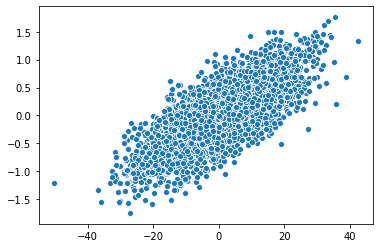

In [15]:
sns.scatterplot(signal01,signal02)

#### 3. use Numpy to generate mutil variate normal distribution

In [24]:
# Spherical Gaussian
mean = [0, 0]
cov = [[1, 0], [0, 1]]
s1, s2 = np.random.multivariate_normal(mean, cov, 5000).T

In [25]:
np.corrcoef(s1, s2)

array([[1., 1.],
       [1., 1.]])

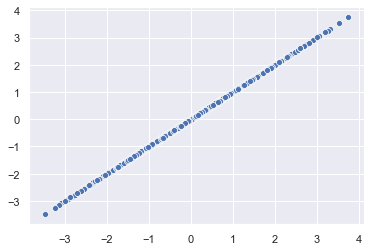

In [26]:
sns.scatterplot(s1,s2)

#### 4. Bonus: 3D scatter plot of seaborn

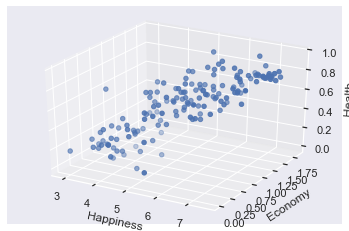

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('data-sets/world-happiness/2016.csv')
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['Happiness Score']
y = df['Economy (GDP per Capita)']
z = df['Health (Life Expectancy)']

ax.set_xlabel("Happiness")
ax.set_ylabel("Economy")
ax.set_zlabel("Health")

ax.scatter(x, y, z)

plt.show()